In [1]:
import pandas as pd
import numpy as np
import datetime
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps


In [2]:
df = pd.read_csv('/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/metadata_compiled.csv')

In [3]:
path = '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'
dataset_directory = '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'
audio_files = [os.path.join(dataset_directory, file) for file in os.listdir(dataset_directory) if file.endswith('.webm')]
num_audio_samples = len(audio_files)
print("Number of audio samples in the dataset:", num_audio_samples)

Number of audio samples in the dataset: 19213


In [4]:
# # load audio function 
# def load_audio(x, path = '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'):
#     try:
#          audio, sr = librosa.load(os.path.join(path, x+".webm"))
#          return audio
#     except:
#          return "error"
# ddf = dd.from_pandas(df['uuid'], npartitions=250) 

In [5]:
# ddf_audio = ddf.apply(load_audio).compute()

In [6]:
#  ddf_audio.rename('wave', inplace=True)
# result = pd.concat([df, ddf_audio], axis=1)
# result['uuid'] #.head()
# result.head()

In [7]:
# import numpy as np
# import librosa
# from scipy import signal
# from scipy.io import wavfile
# from scipy.signal import butter,filtfilt
# from scipy.stats import kurtosis
# import scipy.signal as signal
# from scipy.integrate import simps

# class features:
#     # output should be  a np.array 
#     # names should be a list of the size of output
#     # add the number of features in output of each function
#     n_std_dev = 1
#     n_dummy = 2
#     n_EEPD = 19
#     n_PRE = 1
#     n_ZCR = 1
#     n_RMSP = 1
#     n_DF = 1
#     n_spectral_features = 6
#     n_SF_SSTD = 2
#     n_MFCC = 26
#     n_CF = 1
#     n_LGTH = 1
#     n_SSL_SD = 2
    
#     def __init__(self, FREQ_CUTS):
#         self.FREQ_CUTS = FREQ_CUTS # list of Frequency Bands for the PSD
#         self.n_PSD = len(FREQ_CUTS)
        
#     def std_dev(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = ['std_dev'] # list of output features  
#         std_deviation = np.ones((1,1))*np.std(data[1])
#         return std_deviation, names
    
#     def dummy(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature (MUST BE AN ARRAY)
#         names = ['dummy_feature_2','dummy_3']
#         return np.array([1.,2.]), names
    
#     def fft(self,data):
#         """
#         Compute the spectrum using FFT
#         """
#         fs, cough = data
#         fftdata = np.fft.rfft(cough)
#         return fftdata
    
#     # Envelope Energy Peak Detection
#     def EEPD(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = []
#         fs,cough = data
#         fNyq = fs/2
#         nPeaks = []
#         freq_step = 50
#         for fcl in range(50,1000,freq_step):
#             names = names + ['EEPD'+str(fcl)+'_'+str(fcl+freq_step)]
#             fc = [fcl/fNyq, (fcl+50)/fNyq]
#             b, a = butter(1, fc, btype='bandpass')
#             bpFilt = filtfilt(b, a, cough)
#             b,a = butter(2, 10/fNyq, btype='lowpass')
#             eed = filtfilt(b, a, bpFilt**2)
#             eed = eed/np.max(eed+1e-17)
#             peaks,_ = signal.find_peaks(eed)
#             nPeaks.append(peaks.shape[0])
#         return np.array(nPeaks), names

#     # Phase Power Ratio Estimation
#     def PRE(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = ['Power_Ratio_Est']
#         fs,cough = data
#         phaseLen = int(cough.shape[0]//3)
#         P1 = cough[:phaseLen]
#         P2 = cough[phaseLen:2*phaseLen]
#         P3 = cough[2*phaseLen:]
#         f = np.fft.fftfreq(phaseLen, 1/fs)
#         P1 = np.abs(np.fft.fft(P1)[:phaseLen])
#         P2 = np.abs(np.fft.fft(P2)[:phaseLen])
#         P3 = np.abs(np.fft.fft(P3)[:phaseLen])
#         P2norm = P2/(np.sum(P1)+1e-17)
#         fBin = fs/(2*phaseLen +1e-17)
#         f750,f1k,f2k5 = int(-(-750//fBin)), int(-(-1000//fBin)), int(-(-2500//fBin))
#         ratio =  np.sum(P2norm[f1k:f2k5]) / np.sum(P2norm[:f750])
#         return np.ones((1,1))*ratio, names
    
#     # Zero Crossing Rate
#     def ZCR(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = ['Zero_Crossing_Rate']
#         fs,cough = data
#         ZCR = (np.sum(np.multiply(cough[0:-1],cough[1:])<0)/(len(cough)-1))
#         return np.ones((1,1))*ZCR, names
    
#     # RMS Power
#     def RMSP(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = ['RMS_Power']
#         fs,cough = data
#         RMS = np.sqrt(np.mean(np.square(cough)))
#         return np.ones((1,1))*RMS, names
    
#     # Dominant Frequency
#     def DF(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = ['Dominant_Freq']
#         fs,cough = data
#         cough_fortan = np.asfortranarray(cough)
#         freqs, psd = signal.welch(cough_fortan)
#         DF = freqs[np.argmax(psd)]
#         return  np.ones((1,1))*DF, names
    
#     def spectral_features(self, data):
#         names = ["Spectral_Centroid","Spectral_Rolloff","Spectral_Spread","Spectral_Skewness","Spectral_Kurtosis","Spectral_Bandwidth"]
#         fs, x = data
#         magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
#         length = len(x)
#         freqs = np.abs(np.fft.fftfreq(length, 1.0/fs)[:length//2+1]) # positive frequencies
#         sum_mag = np.sum(magnitudes)
        
#         # spectral centroid = weighted mean of frequencies wrt FFT value at each frequency
#         spec_centroid = np.sum(magnitudes*freqs) / sum_mag

#         #spectral roloff = frequency below which 95% of signal energy lies
#         cumsum_mag = np.cumsum(magnitudes)
#         spec_rolloff = np.min(np.where(cumsum_mag >= 0.95*sum_mag)[0]) 

#         #spectral spread = weighted standard deviation of frequencies wrt FFT value
#         spec_spread = np.sqrt(np.sum(((freqs-spec_centroid)**2)*magnitudes) / sum_mag)

#         #spectral skewness = distribution of the spectrum around its mean
#         spec_skewness = np.sum(((freqs-spec_centroid)**3)*magnitudes) / ((spec_spread**3)*sum_mag)

#         #spectral kurtosis = flatness of spectrum around its mean
#         spec_kurtosis =  np.sum(((freqs-spec_centroid)**4)*magnitudes) / ((spec_spread**4)*sum_mag)

#         #spectral bandwidth = weighted spectral standard deviation
#         p=2
#         spec_bandwidth = (np.sum(magnitudes*(freqs-spec_centroid)**p))**(1/p)

#         return np.array([spec_centroid, spec_rolloff, spec_spread, spec_skewness, spec_kurtosis, spec_bandwidth]), names
    
#     # Spectral Flatness and spectral standard deviation
#     def SF_SSTD(self, data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of the feature
#         names = ['Spectral_Flatness', 'Spectral_StDev']
#         fs,sig = data
#         nperseg = min(900,len(sig))
#         noverlap = min(600,int(nperseg/2))
#         freqs, psd = signal.welch(sig, fs, nperseg=nperseg, noverlap=noverlap)
#         psd_len = len(psd)
#         gmean = np.exp((1/psd_len)*np.sum(np.log(psd + 1e-17)))
#         amean = (1/psd_len)*np.sum(psd)
#         SF = gmean/amean
#         SSTD = np.std(psd)
#         return np.array([SF, SSTD]), names
        
#     #Spectral Slope and Spectral Decrease
#     def SSL_SD(self,data):
#         names=['Spectral_Slope','Spectral_Decrease']
#         b1=0
#         b2=8000
        
#         Fs, x = data
#         s = np.absolute(np.fft.fft(x))
#         s = s[:s.shape[0]//2]
#         muS = np.mean(s)
#         f = np.linspace(0,Fs/2,s.shape[0])
#         muF = np.mean(f)

#         bidx = np.where(np.logical_and(b1 <= f, f <= b2))
#         slope = np.sum(((f-muF)*(s-muS))[bidx]) / np.sum((f[bidx]-muF)**2)

#         k = bidx[0][1:]
#         sb1 = s[bidx[0][0]]
#         decrease = np.sum((s[k]-sb1)/(f[k]-1+1e-17)) / (np.sum(s[k]) + 1e-17)

#         return np.array([slope, decrease]), names
    
#     #MFCC
#     def MFCC(self,data):
#         # data: wav file of segment; fs, signal = wavfile.read(file)
#         # output: value of MFCC coefficient
#         names = []; names_mean = []; names_std = []
#         fs, cough = data
#         n_mfcc = 13
#         for i in range(n_mfcc):
#             names_mean = names_mean + ['MFCC_mean'+str(i)]
#             names_std = names_std +  ['MFCC_std'+str(i)]
#         names = names_mean + names_std
#         mfcc = librosa.feature.mfcc(y = cough, sr = fs, n_mfcc = n_mfcc)
#         mfcc_mean = mfcc.mean(axis=1)
#         mfcc_std = mfcc.std(axis=1)
#         mfcc = np.append(mfcc_mean,mfcc_std)
#         return mfcc, names
    
#     # Crest Factor
#     def CF(self,data):
#         """
#         Compute the crest factor of the signal
#         """
#         fs, cough = data
#         peak = np.amax(np.absolute(cough))
#         RMS = np.sqrt(np.mean(np.square(cough)))
#         return np.ones((1,1))*peak/RMS, ['Crest_Factor']
    
#     def LGTH(self,data):
#         "Compute the length of the segment in seconds"
#         fs, cough = data
#         return np.ones((1,1))*(len(cough)/fs), ['Cough_Length']
    
#     # Power spectral Density 
#     def PSD(self,data):
#         feat = []
#         fs,sig = data
#         nperseg = min(900,len(sig))
#         noverlap=min(600,int(nperseg/2))
#         freqs, psd = signal.welch(sig, fs, nperseg=nperseg, noverlap=noverlap)
#         dx_freq = freqs[1]-freqs[0]
#         total_power = simps(psd, dx=dx_freq)
#         for lf, hf in self.FREQ_CUTS:
#             idx_band = np.logical_and(freqs >= lf, freqs <= hf)
#             band_power = simps(psd[idx_band], dx=dx_freq)
#             feat.append(band_power/total_power)
#         feat = np.array(feat)
#         feat_names = [f'PSD_{lf}-{hf}' for lf, hf in self.FREQ_CUTS]
#         return feat, feat_names
    

In [8]:
# def __preprocess_cough(self, x, fs, cutoff = 6000, normalize = True, filter_ = True, downsample = True):
#         """
#         Normalize, lowpass filter, and downsample cough samples in a given data folder 
        
#         Inputs: x*: (float array) time series cough signal
#         fs*: (int) sampling frequency of the cough signal in Hz
#         cutoff: (int) cutoff frequency of lowpass filter
#         normalize: (bool) normailzation on or off
#         filter: (bool) filtering on or off
#         downsample: (bool) downsampling on or off
#         *: mandatory input
        
#         Outputs: x: (float32 array) new preprocessed cough signal
#         fs: (int) new sampling frequency
#         """
        
#         fs_downsample = cutoff*2
        
#         #Preprocess Data
#         if len(x.shape)>1:
#             x = np.mean(x,axis=1)                          # Convert to mono
#         if normalize:
#             x = x/(np.max(np.abs(x))+1e-17)                # Norm to range between -1 to 1
#         if filter_:
#             b, a = butter(4, fs_downsample/fs, btype='lowpass') # 4th order butter lowpass filter
#             x = filtfilt(b, a, x)
#         if downsample:
#             x = signal.decimate(x, int(fs/fs_downsample)) # Downsample for anti-aliasing
        
#         fs_new = fs_downsample
#         return np.float32(x), fs_new

In [9]:
# def extract_features(x):
#         """Feature extraction for determining if a sound is a cough or not
#         Inputs: 
#             x: (float array) raw cough signal
#             fs: (int) sampling rate of raw signal
#         Outputs:
#             result: (np.array) extracted features
#         """
#         fs = 16000
#         try: 
#             x,fs = __preprocess_cough(x,fs)
#             data = (fs,x)
#             FREQ_CUTS = [(0,200),(300,425),(500,650),(950,1150),(1400,1800),(2300,2400),(2850,2950),(3800,3900)]
#             features_fct_list = ['EEPD','ZCR','RMSP','DF','spectral_features','SF_SSTD','SSL_SD','MFCC','CF','LGTH','PSD']
#             feature_values_vec = []
#             obj = features(FREQ_CUTS)
#             for feature in features_fct_list:
#                 feature_values, feature_names = getattr(obj,feature)(data)
#                 for value  in feature_values:
#                     if isinstance(value,np.ndarray):
#                         feature_values_vec.append(value[0])
#                     else:
#                         feature_values_vec.append(value)
#             return np.array(feature_values_vec).reshape(1,-1)

#         except:
#             print('Error extracting cough detection audio features.')
#             return 0

    

In [10]:
# ddfw = dd.from_pandas(result['wave'], npartitions=250) 

In [11]:
# ddfw

In [12]:
# x,fs= librosa.load('/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/fffce9f0-a5e8-4bee-b13b-c671aac4a61c.webm')


In [ ]:
# def load_audio(x, path = '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'):
#     try:
#          audio, sr = librosa.load(os.path.join(path, x+".webm"))
#          return audio
#     except:
#          return "error"

In [ ]:
# def calculate_zcr(x):
#     # Count zero crossings
#     audio = load_audio(x)
#     if audio =="error":
#         return np.NaN
#     else:
#         zero_crossings = librosa.zero_crossings(audio, pad=False)
#         zcr = sum(zero_crossings)
#         return zcr

In [ ]:
# result.head()

In [ ]:
# ddf = dd.from_pandas(df['uuid'], npartitions=1000) 

In [ ]:
# ddf_zcr = ddf.apply(calculate_zcr).compute()

In [ ]:
# ddf_zcr.rename('ZCR', inplace=True)
# result = pd.concat([df, ddf_zcr], axis=1)
# result.head()

In [4]:
result = pd.read_csv('zcr.csv')

In [5]:
result.head()

,Unnamed: 0,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3,ZCR
0,0,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6898.0
1,1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9075.0
2,2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.0
3,3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89571.0
4,4,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35994.0


In [6]:
zcr_status_df = result.dropna(subset=[ 'ZCR', 'status'], inplace=False)[['ZCR', 'status']]

In [7]:
temp_df = zcr_status_df.sample(n=1000, random_state=7)

In [ ]:
# cd_status_df= df.dropna(subset=[ 'cough_detected', 'status'], inplace=False)[['cough_detected', 'status']]

In [18]:
zcr_status_df['status'].value_counts(normalize =True)

status
healthy        0.757962
symptomatic    0.150928
COVID-19       0.091110
Name: proportion, dtype: float64

In [19]:
group1 = temp_df[temp_df['status']=='healthy']['ZCR'].values
group2 = temp_df[temp_df['status']=='symptomatic']['ZCR'].values
group3 = temp_df[temp_df['status']=='COVID-19']['ZCR'].values

In [20]:
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(group1, group2, group3)
alpha = 0.05
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences among the groups.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences among the groups.")


F-statistic: 0.10384692776659747
P-value: 0.9013730089647959
Fail to reject the null hypothesis. There are no significant differences among the groups.


<Axes: >

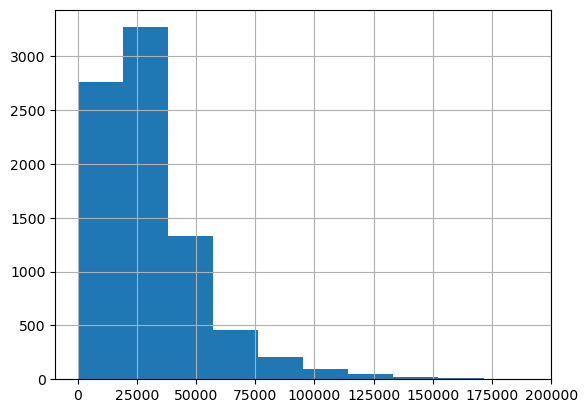

In [21]:
zcr_status_df[zcr_status_df['status']=='healthy']['ZCR'].hist()

<Axes: >

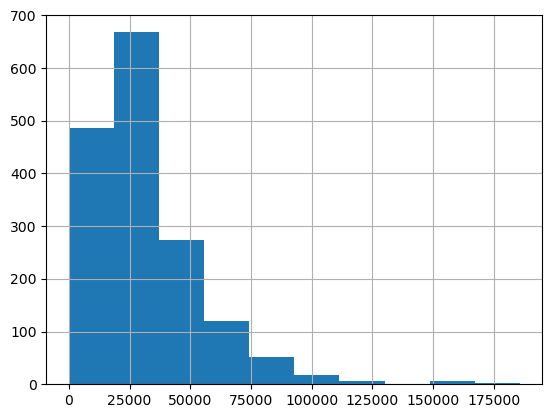

In [22]:
zcr_status_df[zcr_status_df['status']=='symptomatic']['ZCR'].hist()

<Axes: >

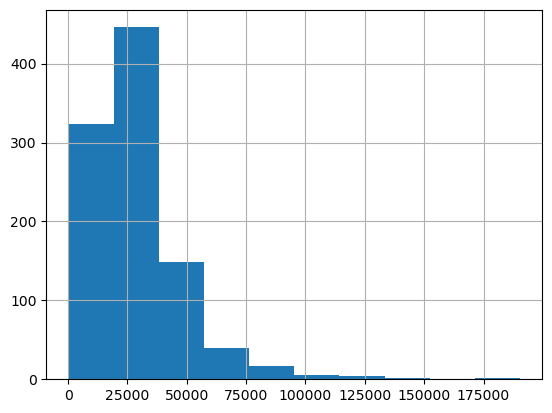

In [23]:
zcr_status_df[zcr_status_df['status']=='COVID-19']['ZCR'].hist()

In [24]:
temp_df.groupby('status')['ZCR'].mean()

status
COVID-19       29078.554217
healthy        29496.676396
symptomatic    30286.775194
Name: ZCR, dtype: float64

In [8]:
zcr_status_df.groupby('status')['ZCR'].mean()

status
COVID-19       28761.442756
healthy        30701.212520
symptomatic    31742.017737
Name: ZCR, dtype: float64

In [9]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

df = zcr_status_df
model = sm.OLS.from_formula('ZCR ~ status', data=df)
results = model.fit()
anova_table = sm.stats.anova_lm(results)
mc = MultiComparison(df['ZCR'], df['status'])
tukey_result = mc.tukeyhsd()
print("ANOVA results:")
print(anova_table)
print("\nTukey's HSD results:")
print(tukey_result)


ANOVA results:
               df        sum_sq       mean_sq         F    PR(>F)
status        2.0  5.480765e+09  2.740383e+09  5.488255  0.004147
Residual  10830.0  5.407610e+12  4.993177e+08       NaN       NaN

Tukey's HSD results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1     group2    meandiff p-adj    lower     upper   reject
----------------------------------------------------------------
COVID-19     healthy 1939.7698  0.027  175.1931 3704.3465   True
COVID-19 symptomatic  2980.575 0.0027   869.278  5091.872   True
 healthy symptomatic 1040.8052 0.1977 -377.6755  2459.286  False
----------------------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
COVID-19,healthy,1939.7698,0.027,175.1931,3704.3465,True
COVID-19,symptomatic,2980.575,0.0027,869.278,5091.872,True
healthy,symptomatic,1040.8052,0.1977,-377.6755,2459.286,False


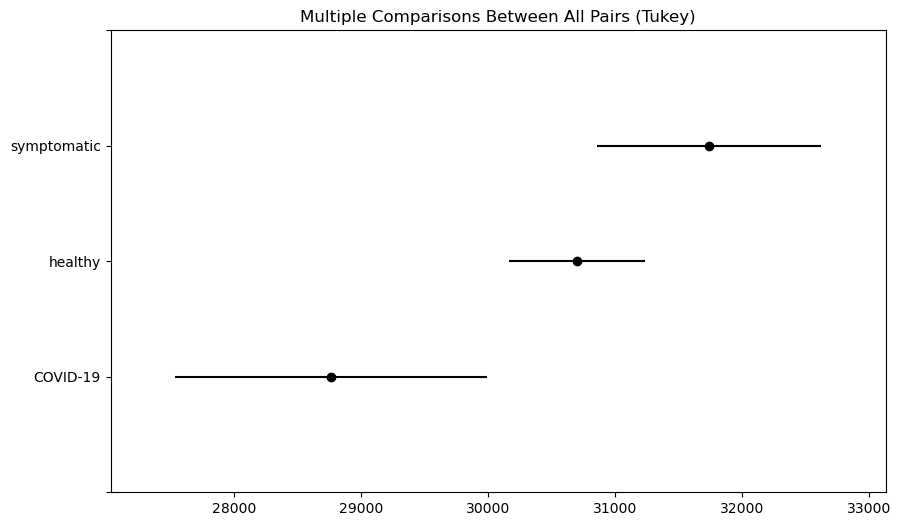

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=zcr_status_df['ZCR'],     # Data
                          groups=zcr_status_df['status'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()    